# Лабораторная работа №1

### Импорт библиотек 

In [67]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Заданные функции

In [68]:
def f_1(x):
    return np.sin(x ** 2)

def f_2(x):
    return np.cos(np.sin(x))

def f_3(x):
    return np.exp(np.sin(np.cos(x)))

def f_4(x):
    return np.log(np.abs(x + 3))

def f_5(x):
    return np.abs(x + 3) ** 0.5

### Область значений аргумента

In [69]:
# linear space
arange = 15
number_of_points = 1024
x = np.linspace(-1 * arange, arange, number_of_points)

### Графики заданных функций

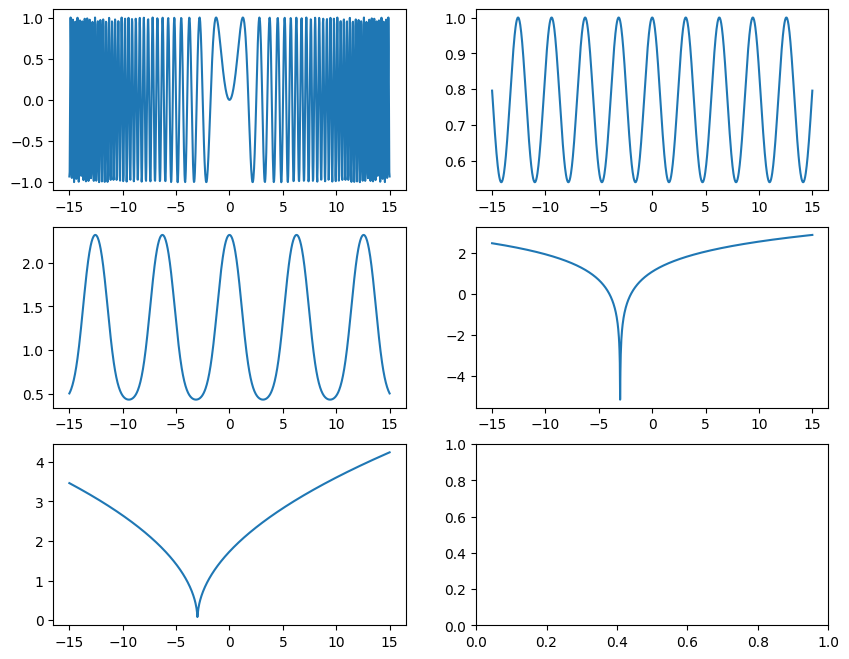

In [70]:
fig, axs = plt.subplots(3, 2, figsize = (10, 8))
axs[0, 0].plot(x, [f_1(i) for i in x])
axs[0, 1].plot(x, [f_2(i) for i in x])
axs[1, 0].plot(x, [f_3(i) for i in x])
axs[1, 1].plot(x, [f_4(i) for i in x])
axs[2, 0].plot(x, [f_5(i) for i in x])

### Производные заданных функций

In [71]:
def der_1(x):
    return 2 * x * np.cos(x ** 2)

def der_2(x):
    return -1 * np.sin(np.sin(x)) * np.cos(x)

def der_3(x):
    return -1 * np.exp(np.sin(np.cos(x))) * np.cos(np.cos(x)) * np.sin(x)

def der_4(x):
    return 1 / (x + 3)

def der_5(x):
    return 1 / (2 * np.sqrt(np.abs(x + 3)))

### Графики производных заданных функций

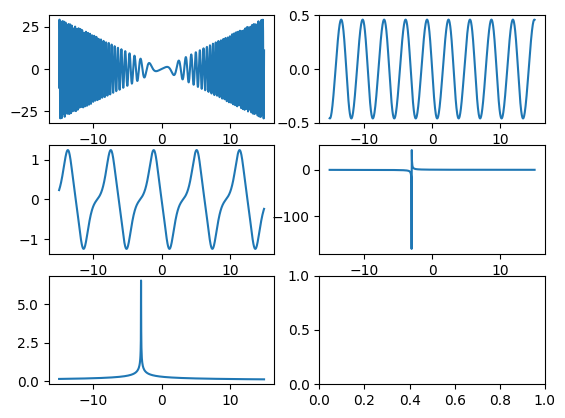

In [72]:
fig, axs = plt.subplots(3, 2)
axs[0, 0].plot(x, [der_1(i) for i in x])
axs[0, 1].plot(x, [der_2(i) for i in x])
axs[1, 0].plot(x, [der_3(i) for i in x])
axs[1, 1].plot(x, [der_4(i) for i in x])
axs[2, 0].plot(x, [der_5(i) for i in x])

### Формулы приближенного вычисления первой производной

In [73]:
def der_approx_1(f, x, h):
    return (f(x + h) - f(x)) / h

def der_approx_2(f, x, h):
    return (f(x) - f(x - h)) / h

def der_approx_3(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def der_approx_4(f, x, h):
    return (4 / 3 * (f(x + h) - f(x - h)) / (2 * h)) - (1 / 3 * (f(x + 2 * h) - f(x - 2 * h)) / (4 * h))

def der_approx_5(f, x, h):
    return (3 / 2 * (f(x + h) - f(x - h)) / (2 * h)) - (3 / 5 * (f(x + 2 * h) - f(x - 2 * h)) / (4 * h)) + (1 / 10 * (f(x + 3 * h) - f(x - 3 * h)) / (6 * h))

### Область значений h и n

In [74]:
n = np.linspace(1, 21, 1024)
h = 2 / np.float_power(2, n)

### Функции для подсчета погрешностей приближения и отрисовки графиков

In [75]:
def approximation_error(f, der, der_approx, h):
    """Функция для подсчета погрешности между 2мя фукнциями первых производных"""
    x = np.linspace(3, 10, 1024)
    return max(np.abs(der(x) - der_approx(f, x, h)))

def drow_graphs(ax, h, f, der):
    """Функция отрисовки графиков погрешностей, в зависимости от формулы приближения"""
    ax.plot(np.log2(h), [np.log(approximation_error(f, der, der_approx_1, i)) for i in h], color='red')
    ax.plot(np.log2(h), [np.log(approximation_error(f, der, der_approx_2, i)) for i in h], color='green')
    ax.plot(np.log2(h), [np.log(approximation_error(f, der, der_approx_3, i)) for i in h], color='blue')
    ax.plot(np.log2(h), [np.log(approximation_error(f, der, der_approx_4, i)) for i in h], color='orange')
    ax.plot(np.log2(h), [np.log(approximation_error(f, der, der_approx_5, i)) for i in h], color='magenta')

### Графики погрешностей

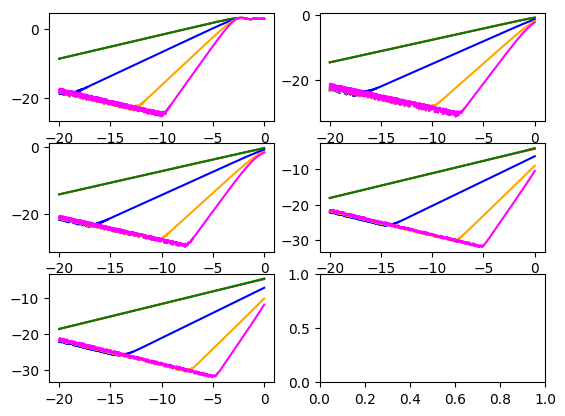

In [76]:
fig, axs = plt.subplots(3, 2)
drow_graphs(axs[0, 0], h, f_1, der_1)
drow_graphs(axs[0, 1], h, f_2, der_2)
drow_graphs(axs[1, 0], h, f_3, der_3)
drow_graphs(axs[1, 1], h, f_4, der_4)
drow_graphs(axs[2, 0], h, f_5, der_5)

### Большая версия

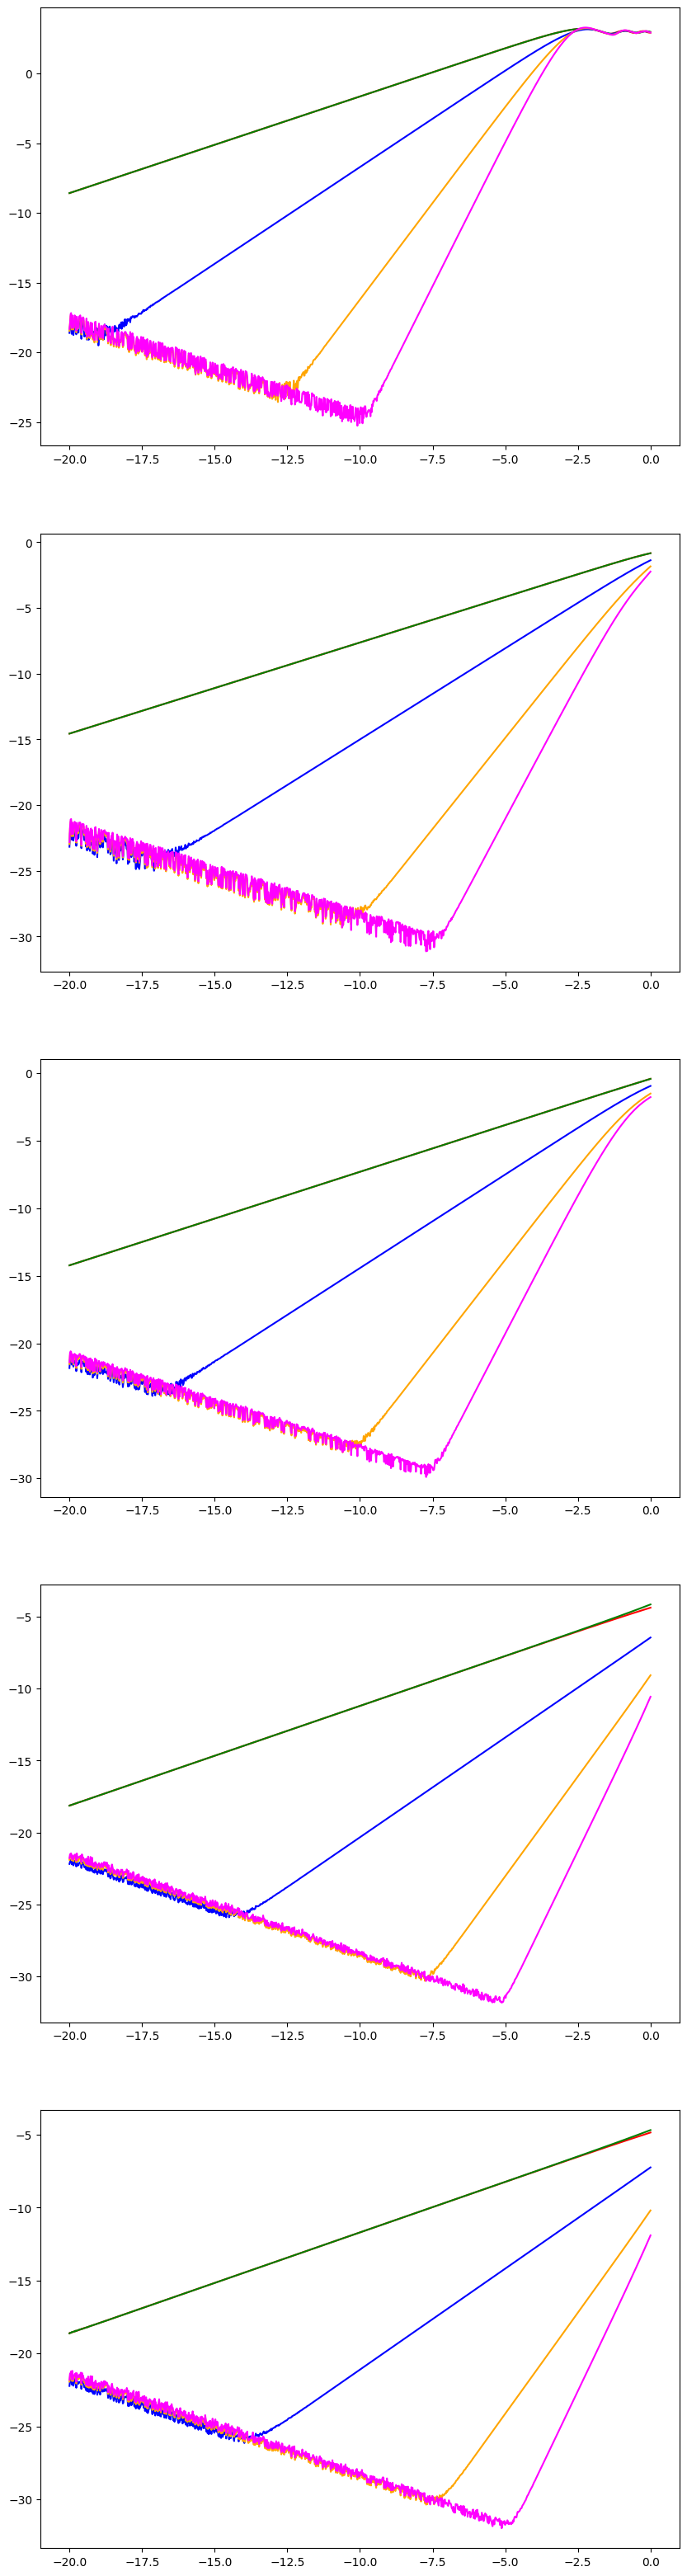

In [77]:
fig, axs = plt.subplots(5, 1, figsize = (10, 40))
drow_graphs(axs[0], h, f_1, der_1)
drow_graphs(axs[1], h, f_2, der_2)
drow_graphs(axs[2], h, f_3, der_3)
drow_graphs(axs[3], h, f_4, der_4)
drow_graphs(axs[4], h, f_5, der_5)